In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import spacy
from wordcloud import WordCloud

In [2]:
reviews = pd.read_csv('ipad_reviews.txt',error_bad_lines=False,sep=',',encoding='cp1252')

b'Skipping line 4: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 3\nSkipping line 12: expected 1 fields, saw 5\nSkipping line 13: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 4\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 21: expected 1 fields, saw 2\nSkipping line 23: expected 1 fields, saw 3\nSkipping line 24: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields, saw 8\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 30: expected 1 fields, saw 2\nSkipping line 32: expected 1 fields, saw 2\nSkipping line 34: expected 1 fields, saw 2\nSkipping line 35: expected 1 fields, saw 3\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 40: expected 1 fields, saw 2\nSkipping line 41: expected 1 fields, saw 2\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 3\nSkipping line 62: expected 1 fields, saw 2\nSkipping line 63: expected 1 fi

In [3]:
reviews

,x
0,Discount offered by the seller is great... dis...
1,The best ipad I have used . This is my first i...
2,worst ipad ever even nokia is better than this...
3,ipad Pro is looking so Beautiful
4,I love this ipad...my dream ipad....one day i ...
5,Good ipad nice price and battery life is good ...
6,Nice product. But charger should be there.
7,Not recommended. It is a waste of money. Be lo...
8,Cons: Running out of Kidneys to sell to buy ip...
9,Make sure to get a decent Screen guard and cle...


In [4]:
import re  #regular expression
import string


In [5]:
def clean_data(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_data(x)

In [6]:
reviews['x'] = reviews.x.apply(clean)

In [7]:
reviews['x']


0     discount offered by the seller is great discou...
1     the best ipad i have used  this is my first ip...
2     worst ipad ever even nokia is better than this...
3                      ipad pro is looking so beautiful
4     i love this ipadmy dream ipadone day i buy thi...
5     good ipad nice price and battery life is good ...
6              nice product but charger should be there
7     not recommended it is a waste of money be logi...
8     cons running out of kidneys to sell to buy ipa...
9     make sure to get a decent screen guard and cle...
10    had pre booked this ipad pro  amazon delivered...
11    build quality is significantly improved this d...
12    the ipad does feels premium when one holds it ...
13    i fell like the ipad is bit expensive then it ...
14    the ipad crashed within  days of purchase and ...
15    highly recommended business ipad security and ...
16    enough has been said already about this ipad t...
17    that  of people who are going to buy this 

In [8]:
reviews1 = reviews.copy()

# Remove Spaces

In [9]:
#remove both the leading and the trailing characters
reviews = [x.strip() for x in reviews.x]

In [10]:
# removes empty strings
reviews = [x for x in reviews if x]


In [11]:
reviews[0:10]

['discount offered by the seller is great discount offered by the seller is great',
 'the best ipad i have used  this is my first ipad and i never liked ipad  but after getting frustrated with battery life multiple androids  i decided to bit the dust and pay money to buy quality ipad  and now that i own it  i dont regret it at all  two days battery with  to  hours on screen time  if used moderately',
 'worst ipad ever even nokia is better than this  very bad quality does not even start  dont buy',
 'ipad pro is looking so beautiful',
 'i love this ipadmy dream ipadone day i buy this ipadthis ipad is fabulous outstanding ipad i need this ipad',
 'good ipad nice price and battery life is good nice quality device and nice ios quality good performance and good features',
 'nice product but charger should be there',
 'not recommended it is a waste of money be logical enough to make a call on this',
 'cons running out of kidneys to sell to buy ipads in india',
 'make sure to get a decent scr

In [12]:
#Joining the list into one string
allreviews = ' '.join(reviews)
allreviews

'discount offered by the seller is great discount offered by the seller is great the best ipad i have used  this is my first ipad and i never liked ipad  but after getting frustrated with battery life multiple androids  i decided to bit the dust and pay money to buy quality ipad  and now that i own it  i dont regret it at all  two days battery with  to  hours on screen time  if used moderately worst ipad ever even nokia is better than this  very bad quality does not even start  dont buy ipad pro is looking so beautiful i love this ipadmy dream ipadone day i buy this ipadthis ipad is fabulous outstanding ipad i need this ipad good ipad nice price and battery life is good nice quality device and nice ios quality good performance and good features nice product but charger should be there not recommended it is a waste of money be logical enough to make a call on this cons running out of kidneys to sell to buy ipads in india make sure to get a decent screen guard and clear case just to safe

# Part Of Speech

In [13]:
nlp = spacy.load('en_core_web_sm')

allreviews1 = nlp(allreviews)
spacy.displacy.render(allreviews1,style='ent',jupyter=True)

In [14]:
#tokenization
for token in allreviews1[0:50]:
  print(token,token.pos_)

discount NOUN
offered VERB
by ADP
the DET
seller NOUN
is AUX
great ADJ
discount NOUN
offered VERB
by ADP
the DET
seller NOUN
is VERB
great ADJ
the DET
best ADJ
ipad NOUN
i PRON
have AUX
used VERB
  SPACE
this DET
is AUX
my PRON
first ADJ
ipad NOUN
and CCONJ
i PRON
never ADV
liked VERB
ipad NOUN
  SPACE
but CCONJ
after ADP
getting AUX
frustrated VERB
with ADP
battery NOUN
life NOUN
multiple ADJ
androids NOUN
  SPACE
i PRON
decided VERB
to PART
bit VERB
the DET
dust NOUN
and CCONJ
pay VERB


In [15]:
#Filtering for nouns and verbs only
noun_vrbs = [token.text for token in allreviews1 if token.pos_ in ('NOUN','VERB')]
print(noun_vrbs[0:20])

['discount', 'offered', 'seller', 'discount', 'offered', 'seller', 'is', 'ipad', 'used', 'ipad', 'liked', 'ipad', 'frustrated', 'battery', 'life', 'androids', 'decided', 'bit', 'dust', 'pay']


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [17]:
X = cv.fit_transform(noun_vrbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,ipad,43
1,is,13
2,battery,10
3,quality,9
4,life,6
5,buy,6
6,screen,6
7,time,6
8,used,5
9,get,5


<AxesSubplot:title={'center':'Top Nouns and Verbs'}, xlabel='word'>

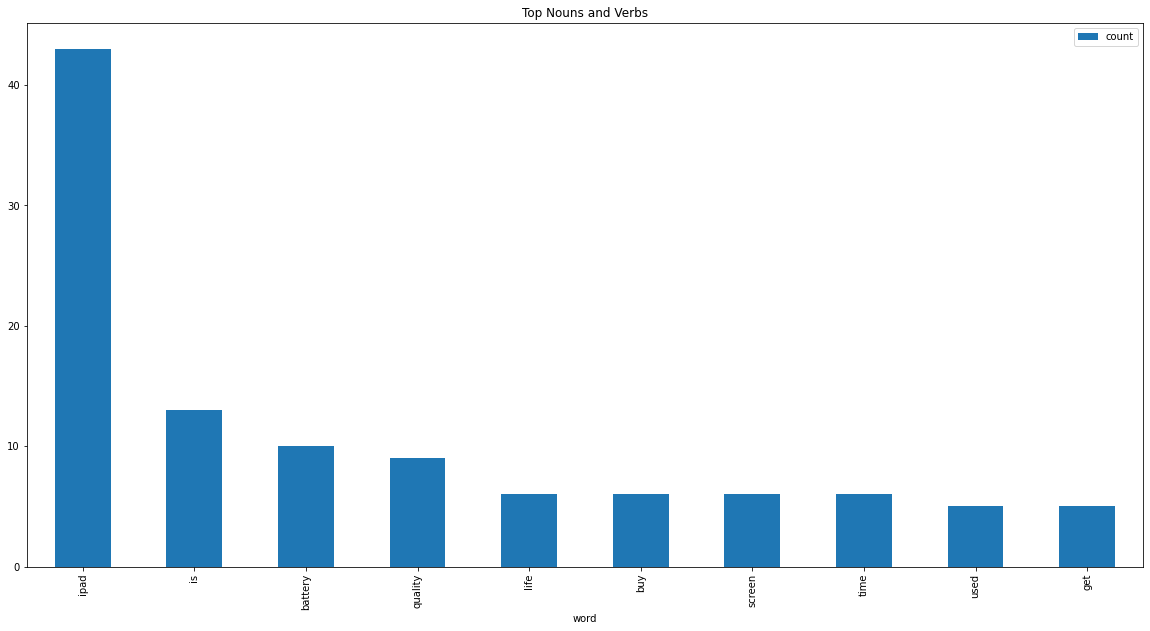

In [18]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(20,10), title='Top Nouns and Verbs')

# Emotion Mining

In [19]:
afinn = pd.read_csv('Afinn.csv',sep=',',encoding='cp1252')


In [20]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rohit
[nltk_data]     Chavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(reviews))

In [23]:
sentence[0:10]

['discount offered by the seller is great discount offered by the seller is great the best ipad i have used  this is my first ipad and i never liked ipad  but after getting frustrated with battery life multiple androids  i decided to bit the dust and pay money to buy quality ipad  and now that i own it  i dont regret it at all  two days battery with  to  hours on screen time  if used moderately worst ipad ever even nokia is better than this  very bad quality does not even start  dont buy ipad pro is looking so beautiful i love this ipadmy dream ipadone day i buy this ipadthis ipad is fabulous outstanding ipad i need this ipad good ipad nice price and battery life is good nice quality device and nice ios quality good performance and good features nice product but charger should be there not recommended it is a waste of money be logical enough to make a call on this cons running out of kidneys to sell to buy ipads in india make sure to get a decent screen guard and clear case just to saf

In [24]:
reviews1

,x
0,discount offered by the seller is great discou...
1,the best ipad i have used this is my first ip...
2,worst ipad ever even nokia is better than this...
3,ipad pro is looking so beautiful
4,i love this ipadmy dream ipadone day i buy thi...
5,good ipad nice price and battery life is good ...
6,nice product but charger should be there
7,not recommended it is a waste of money be logi...
8,cons running out of kidneys to sell to buy ipa...
9,make sure to get a decent screen guard and cle...


In [25]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [26]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [27]:
reviews1['Sentiment_score'] = reviews1['x'].apply(calculate_sentiment)

In [28]:
reviews1

,x,Sentiment_score
0,discount offered by the seller is great discou...,6
1,the best ipad i have used this is my first ip...,0
2,worst ipad ever even nokia is better than this...,-6
3,ipad pro is looking so beautiful,3
4,i love this ipadmy dream ipadone day i buy thi...,13
5,good ipad nice price and battery life is good ...,21
6,nice product but charger should be there,3
7,not recommended it is a waste of money be logi...,1
8,cons running out of kidneys to sell to buy ipa...,0
9,make sure to get a decent screen guard and cle...,1


In [29]:
reviews1.sort_values(by='Sentiment_score').tail(10)
#High Ratings

,x,Sentiment_score
37,extremely ultimate product from apple feeling...,5
24,i have upgraded from ipad theres nothing much...,5
40,the charm of ipad to its fullest camera is gre...,6
0,discount offered by the seller is great discou...,6
43,wonderful ipad but very expensive and an absol...,8
11,build quality is significantly improved this d...,10
21,amazing machine beautiful new design if you ca...,10
4,i love this ipadmy dream ipadone day i buy thi...,13
13,i fell like the ipad is bit expensive then it ...,17
5,good ipad nice price and battery life is good ...,21


In [30]:
#Low Rating
reviews1.sort_values(by='Sentiment_score').head(10)

,x,Sentiment_score
2,worst ipad ever even nokia is better than this...,-6
14,the ipad crashed within days of purchase and ...,-5
38,you wont regret buying this ipad,-2
42,a biggie which cant be forgotten,-1
26,the best ipad i have used this is my first ip...,0
1,the best ipad i have used this is my first ip...,0
23,the simplest review,0
39,really beast really value for money battery,0
31,what a grt ipad superfast speed camera quality...,0
8,cons running out of kidneys to sell to buy ipa...,0


In [31]:
reviews1['Sentiment_score'].describe()

count    46.000000
mean      3.108696
std       4.868165
min      -6.000000
25%       0.000000
50%       3.000000
75%       3.750000
max      21.000000
Name: Sentiment_score, dtype: float64

In [32]:
#Best Rating
reviews1[reviews1['Sentiment_score'] >=10]

,x,Sentiment_score
4,i love this ipadmy dream ipadone day i buy thi...,13
5,good ipad nice price and battery life is good ...,21
11,build quality is significantly improved this d...,10
13,i fell like the ipad is bit expensive then it ...,17
21,amazing machine beautiful new design if you ca...,10


In [33]:
#Worst Rating
reviews1[reviews1['Sentiment_score']<0]

,x,Sentiment_score
2,worst ipad ever even nokia is better than this...,-6
14,the ipad crashed within days of purchase and ...,-5
38,you wont regret buying this ipad,-2
42,a biggie which cant be forgotten,-1


C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_score', ylabel='Density'>

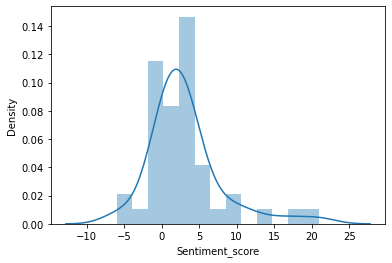

In [34]:
sns.distplot(reviews1['Sentiment_score'])

In [35]:
reviews1['index'] = range(0,len(reviews1))

<AxesSubplot:xlabel='index', ylabel='Sentiment_score'>

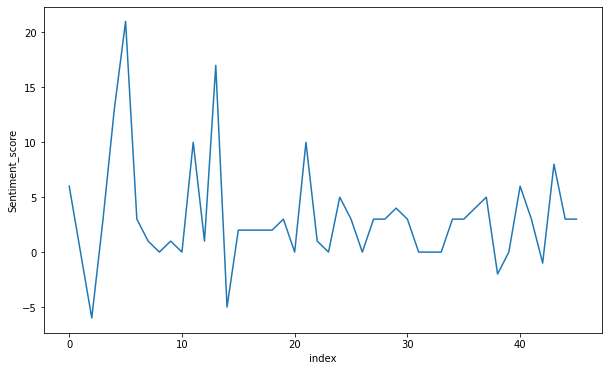

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(y='Sentiment_score',x='index',data=reviews1)

In [37]:
reviews1['word_count'] = reviews1['x'].str.split().apply(len)

In [38]:
reviews1['word_count'].head()

0    14
1    62
2    18
3     6
4    20
Name: word_count, dtype: int64

<AxesSubplot:title={'center':'Sentiment Value to Word Count'}, xlabel='word_count', ylabel='Sentiment_score'>

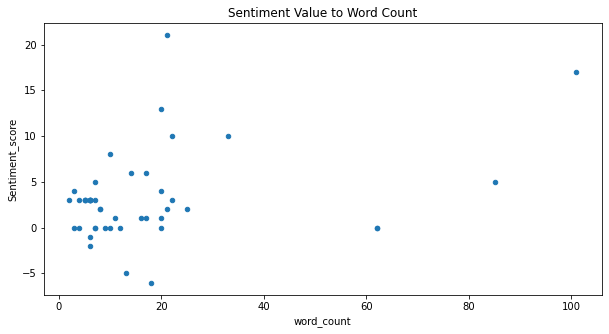

In [39]:
reviews1.plot.scatter(x='word_count',y='Sentiment_score',figsize=(10,5),title='Sentiment Value to Word Count')

In [40]:
string_total= " ".join(reviews)

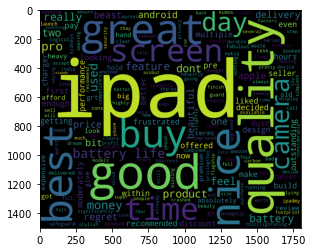

In [41]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_total)
plt.imshow(wordcloud_stw)